In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import scipy.stats as st 
import os
os.chdir('C:\\Users\\Shashi Katteri\\Downloads')

In [2]:
df=pd.read_csv('train.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df1=df.drop(['Name','PassengerId'],axis=1)

Since name and passender ID dont help in prediction we will drop these two columns

In [6]:
df1.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Observations 

1. Mean and median of  age are close so the data is not skewed

2. Mean of fare is much more higher than median and hence the data is right skewed 

In [7]:
df1.describe(include='object')

,Sex,Ticket,Cabin,Embarked
count,891,891,204,889
unique,2,681,147,3
top,male,CA. 2343,G6,S
freq,577,7,4,644


Cabin has most of its values missing. We should probably make it an dummy variable

In [8]:
df1=df1.drop(['Ticket'],axis=1)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


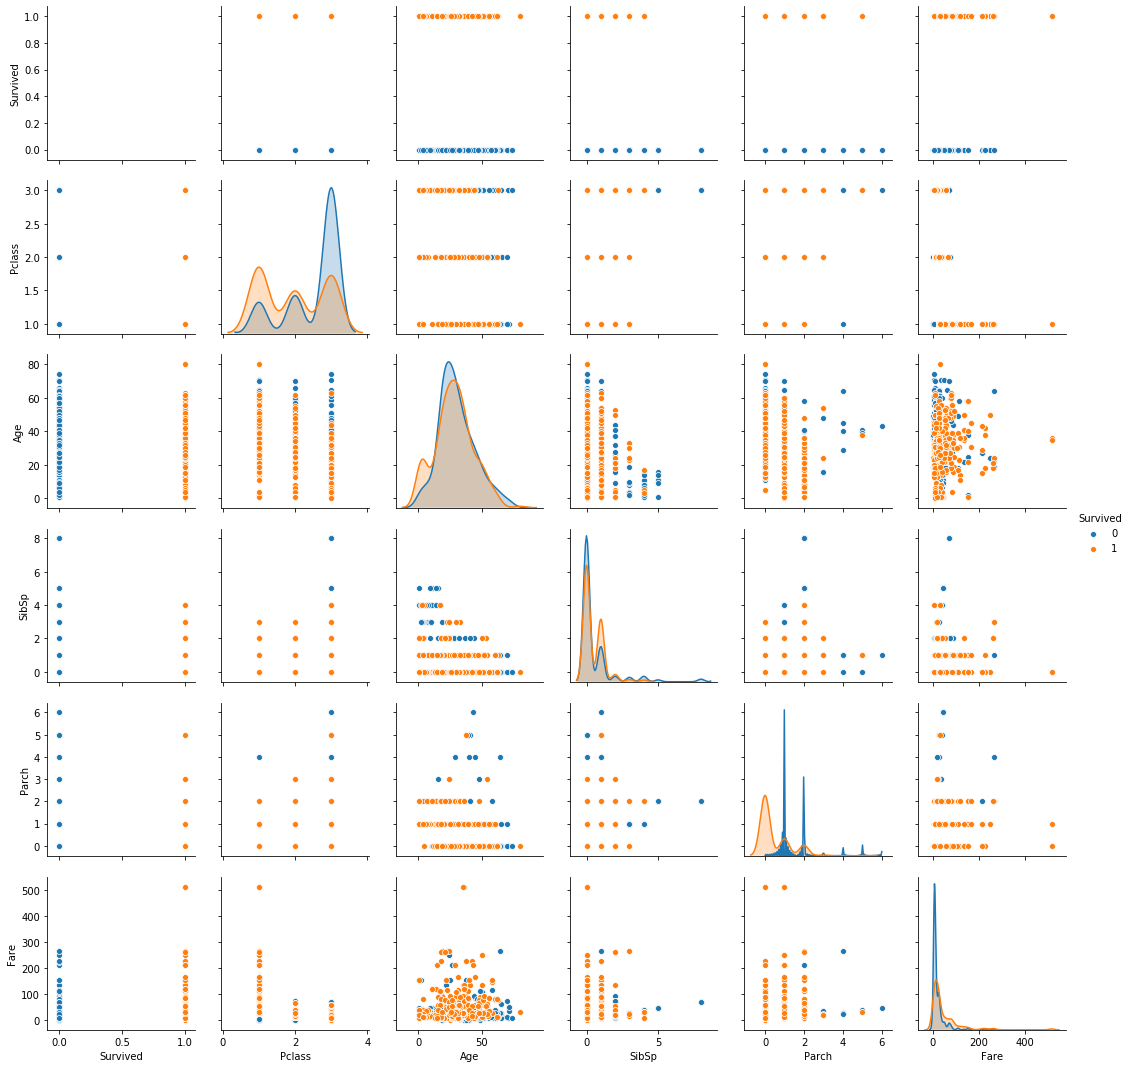

In [35]:
sns.pairplot(df1,diag_kind='kde',hue='Survived')

### Observations

1. We can clearly see that many of the people from class 3 did not survive.
2. Age does not play much of an important role in survival. Although the small peak on the left shows that childen were more likely to be saved
3. In parch we see a peak for survivors at 0. This shows that people without parents or children aboard the ship survived more

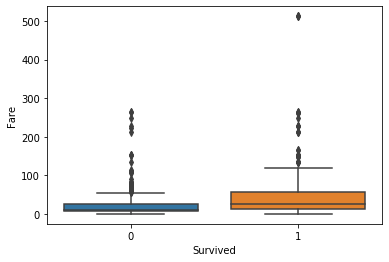

In [10]:
sns.boxplot(x='Survived',y='Fare',data=df1)

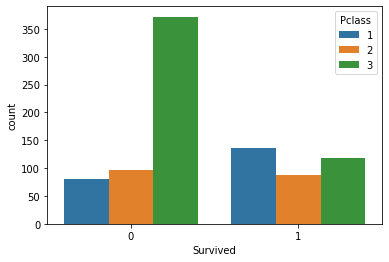

In [11]:
sns.countplot(x='Survived',hue='Pclass',data=df1)

In [72]:
df2.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [13]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


## Data preperation

In [15]:
df2=pd.get_dummies(columns=['Sex','Embarked'],drop_first=True,data=df1)

In [31]:
df2['Cabin_yes']=df2['Cabin'].isnull().apply(lambda x:int(not(x)))

In [32]:
df2.Cabin_yes.value_counts()

0    687
1    204
Name: Cabin_yes, dtype: int64

In [33]:
df2=df2.drop('Cabin',axis=1)

In [43]:
df2['Age']=df2['Age'].fillna(method='ffill')

In [44]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
Survived      891 non-null int64
Pclass        891 non-null int64
Age           891 non-null float64
SibSp         891 non-null int64
Parch         891 non-null int64
Fare          891 non-null float64
Sex_male      891 non-null uint8
Embarked_Q    891 non-null uint8
Embarked_S    891 non-null uint8
Cabin_yes     891 non-null int64
dtypes: float64(2), int64(5), uint8(3)
memory usage: 51.5 KB


In [73]:
x=df2.drop('Survived',axis=1)
y=df2['Survived']
from sklearn.model_selection import train_test_split as tts

x_train,x_test,y_train,y_test= tts(x,y,test_size=0.3,random_state=66)



In [74]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(solver='liblinear')
base_lr=lr.fit(x_train,y_train)

In [75]:
def model_eval(algo,x_train,x_test,y_train,y_test):
    
    from sklearn.model_selection import train_test_split as tts
    #x_train,x_test,y_train,y_test= tts(x,y,test_size=0.3,random_state=3)
    
    mod=algo.fit(x_train,y_train)

    from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score,roc_curve,classification_report

    train_pred=mod.predict(x_train)
    train_prob=mod.predict_proba(x_train)[:,1]

    print('overall accuracy -Train: ',accuracy_score(y_train,train_pred))
    print('confusion matrix:\n',confusion_matrix (y_train,train_pred))
    print('AUC-train:',roc_auc_score(y_train,train_prob))

    test_pred=mod.predict(x_test)
    test_prob=mod.predict_proba(x_test)[:,1]
   
    print('overall accuracy -Test: ',accuracy_score(y_test,test_pred))
    print('confusion matrix:\n',confusion_matrix (y_test,test_pred))
    print('AUC-Test:',roc_auc_score(y_test,test_prob))
    print('Classification report: \n',classification_report(y_test,test_pred))


    fpr,tpr,th=roc_curve(y_test,test_prob)
    fig,ax=plt.subplots()
    plt.plot(fpr,tpr)
    plt.plot(fpr,fpr)
    

overall accuracy -Train:  0.8073836276083467
confusion matrix:
 [[324  50]
 [ 70 179]]
AUC-train: 0.8573223374782553
overall accuracy -Test:  0.7873134328358209
confusion matrix:
 [[145  30]
 [ 27  66]]
AUC-Test: 0.8627342549923195
Classification report: 
               precision    recall  f1-score   support

           0       0.84      0.83      0.84       175
           1       0.69      0.71      0.70        93

    accuracy                           0.79       268
   macro avg       0.77      0.77      0.77       268
weighted avg       0.79      0.79      0.79       268



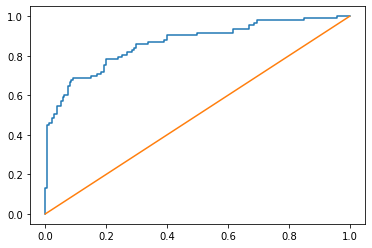

In [76]:
model_eval(lr,x_train,x_test,y_train,y_test)

We can clearly see that the logistic regression model is overfitting. The performance is drastically dropping while testing

### Random forrest

In [77]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()

overall accuracy -Train:  0.9887640449438202
confusion matrix:
 [[373   1]
 [  6 243]]
AUC-train: 0.9994308785945922
overall accuracy -Test:  0.8097014925373134
confusion matrix:
 [[152  23]
 [ 28  65]]
AUC-Test: 0.8582795698924731
Classification report: 
               precision    recall  f1-score   support

           0       0.84      0.87      0.86       175
           1       0.74      0.70      0.72        93

    accuracy                           0.81       268
   macro avg       0.79      0.78      0.79       268
weighted avg       0.81      0.81      0.81       268



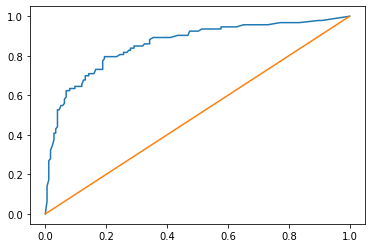

In [78]:
model_eval(rfc,x_train,x_test,y_train,y_test)

In [79]:
from sklearn.model_selection import RandomizedSearchCV

params1={'n_estimators':st.randint(50,200),
    'criterion':['gini','entropy'],
    'max_depth':st.randint(2,20),
    'min_samples_split':st.randint(2,20),
    'min_samples_leaf':st.randint(1,20)}
rs=RandomizedSearchCV(rfc,param_distributions=params1,random_state=4,scoring='roc_auc')
rs_mod1= rs.fit(x,y)
print(rs_mod1.best_params_,rs_mod1.best_score_)

{'criterion': 'entropy', 'max_depth': 11, 'min_samples_leaf': 7, 'min_samples_split': 8, 'n_estimators': 106} 0.8728806916391679


overall accuracy -Train:  0.8539325842696629
confusion matrix:
 [[348  26]
 [ 65 184]]
AUC-train: 0.9227659300302815
overall accuracy -Test:  0.832089552238806
confusion matrix:
 [[161  14]
 [ 31  62]]
AUC-Test: 0.8784639016897081
Classification report: 
               precision    recall  f1-score   support

           0       0.84      0.92      0.88       175
           1       0.82      0.67      0.73        93

    accuracy                           0.83       268
   macro avg       0.83      0.79      0.81       268
weighted avg       0.83      0.83      0.83       268



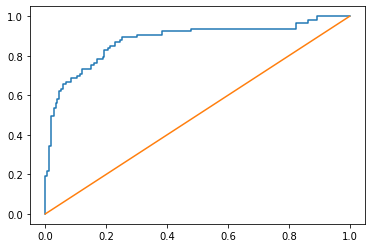

In [80]:
rfc=RandomForestClassifier(**rs_mod1.best_params_)
model_eval(rfc,x_train,x_test,y_train,y_test)

In [82]:
import lightgbm as lgb
l=lgb.LGBMClassifier()


In [87]:
params2={'num_leaves':st.randint(2,50),
    'max_depth':st.randint(2,20),
    'learning_rate':st.uniform(0.001,0.5),
    'n_estimators':st.randint(50,200)}
rs_lgb=RandomizedSearchCV(l,param_distributions=params2,random_state=8,scoring='roc_auc').fit(x,y)
print(rs_lgb.best_params_,'\n',rs_lgb.best_score_)

{'learning_rate': 0.027905392180387123, 'max_depth': 11, 'n_estimators': 116, 'num_leaves': 40} 
 0.8751989722893544


overall accuracy -Train:  0.8828250401284109
confusion matrix:
 [[350  24]
 [ 49 200]]
AUC-train: 0.9472649958121255
overall accuracy -Test:  0.8694029850746269
confusion matrix:
 [[161  14]
 [ 21  72]]
AUC-Test: 0.8834408602150537
Classification report: 
               precision    recall  f1-score   support

           0       0.88      0.92      0.90       175
           1       0.84      0.77      0.80        93

    accuracy                           0.87       268
   macro avg       0.86      0.85      0.85       268
weighted avg       0.87      0.87      0.87       268



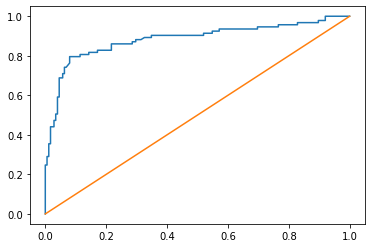

In [88]:
l_mod=lgb.LGBMClassifier(**rs_lgb.best_params_)
model_eval(l_mod,x_train,x_test,y_train,y_test)

In [124]:
test=pd.read_csv('test.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [97]:
test=test.drop(['Name','PassengerId','Ticket'],axis=1)

In [98]:
test=pd.get_dummies(columns=['Sex','Embarked'],drop_first=True,data=test)

In [99]:
test['Cabin_yes']=test['Cabin'].isnull().apply(lambda x:int(not(x)))

In [100]:
test.Cabin_yes.value_counts()

0    327
1     91
Name: Cabin_yes, dtype: int64

In [101]:
test=test.drop('Cabin',axis=1)

In [102]:
test['Age']=test['Age'].fillna(method='ffill')

In [103]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
Pclass        418 non-null int64
Age           418 non-null float64
SibSp         418 non-null int64
Parch         418 non-null int64
Fare          417 non-null float64
Sex_male      418 non-null uint8
Embarked_Q    418 non-null uint8
Embarked_S    418 non-null uint8
Cabin_yes     418 non-null int64
dtypes: float64(2), int64(4), uint8(3)
memory usage: 20.9 KB


In [108]:
prob=l_mod.predict_proba(test)
pred=l_mod.predict(test)


In [110]:
prediction=pd.DataFrame(data={'pred':pred,'prob':prob[:,1]})
prediction.head()

,pred,prob
0,0,0.129403
1,0,0.419850
2,0,0.085996
3,0,0.051624
4,1,0.545154


In [111]:
prediction.pred.value_counts()

0    273
1    145
Name: pred, dtype: int64

In [112]:
mod=l_mod

from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score,roc_curve,classification_report

train_pred=mod.predict(x_train)
train_prob=mod.predict_proba(x_train)[:,1]


test_pred=mod.predict(x_test)
test_prob=mod.predict_proba(x_test)[:,1]



fpr,tpr,th=roc_curve(y_test,test_prob)

In [113]:
roc=pd.DataFrame(data={'fpr':fpr,'tpr':tpr,'tresh':th})

In [117]:
roc.iloc[20:40:]

,fpr,tpr,tresh
20,0.057143,0.709677,0.587761
21,0.062857,0.709677,0.556707
22,0.062857,0.731183,0.547047
23,0.062857,0.741935,0.541121
24,0.068571,0.741935,0.535579
25,0.080000,0.763441,0.522747
26,0.080000,0.795699,0.478139
27,0.114286,0.795699,0.420075
28,0.114286,0.806452,0.418587
29,0.142857,0.806452,0.377891


In [120]:
prediction['tresh_pred']=prediction.prob.apply(lambda x:1 if x>0.478139 else 0)

In [121]:
prediction['tresh_pred'].value_counts()

0    264
1    154
Name: tresh_pred, dtype: int64

In [126]:
#prediction=prediction.drop(['prob','pred'],axis=1)
prediction['PassengerId']=test['PassengerId']

In [128]:
prediction['pred']=prediction.tresh_pred

In [129]:
prediction=prediction.drop('tresh_pred',axis=1)

In [130]:
prediction.head()

,PassengerId,pred
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [131]:
prediction.to_csv('prediction.csv')